In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df=pd.read_csv("probi2.csv", sep=";")


df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 1 to 520
Columns: 181 entries, X...id to break_treatment
dtypes: float64(107), int64(59), object(15)
memory usage: 739.4+ KB


In [4]:
pd.set_option('display.max_columns', 180)

df.tail(30)

,X...id,f1,f2_x1,f2_y1,break_pinpoint_recoded_f2,f4_r1,f4_r2,f4_r3,f4_r4,f4_r5,f4_r6,f4_r7,f4_r8,f4_r9,f4_r10,f7_r1,f7_r2,f7_r3,f7_r4,f7_r5,f7_r6,f7_r7,f7_r8,f7_r9,f7_r10,f7_r11,f7_r12,f7_r13,f7_r14,f7_r15,f8,f9_r1,f9_r2,f9_r3,f9_r4,f9_r5,f9_r6,f9_r7,f9_r8,f9_r9,f9_r10,f9_r11,f9_r12,f9_r13,f9_r14,f9_r15,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f10_7,f10_8,f10_9,f10_10,f10_11,f10_12,f10_13_other,f11_r1_Bike,f11_r2_Solarpanel,f11_r3_Wasser,f11_r4_Ski,f12a1_1_Bike,f12a1_kat_Bike,f13a1_a1_Bike,f13a1_a2_Bike,f13a1_wn_1_Bike,f13a1kat_Bike_estimated_product_price,f14_f15_combined_pb_ebike_1,f14_f15_combined_pb_ebike_2,f14_f15_combined_pb_ebike_3,f14_f15_combined_pb_ebike_4,f14_f15_combined_pb_ebike_5,f14_f15_combined_pb_ebike_6,f14_f15_combined_pb_ebike_7,f14_f15_combined_pb_ebike_8,f16a1_a1_Bike,f16a1_a2_Bike,f16a1_a3_Bike,f12a2_1_Solarpanel,f12a2_kat_Solarpanel,f13a2_a1_Solarpanel,f13a2_a2_Solarpanel,f13a2_wn_1_Solarpanel,f13a2kat_Solarpanel_estimated_product_price,f14_f15_combined_pb_panel_1,f14_f15_combined_pb_panel_2,f14_f15_combined_pb_panel_3,f14_f15_combined_pb_panel_4,...,f14_f15_combined_pb_panel_6,f14_f15_combined_pb_panel_7,f14_f15_combined_pb_panel_8,f16a2_a1_Solarpanel,f16a2_a2_Solarpanel,f16a2_a3_Solarpanel,f12a3_1_Wasser,f12a3_kat_Wasser,f13a3_a1_Wasser,f13a3_a2_Wasser,f13a3_wn_1_Wasser,f13a3kat_Wasser_estimated_product_price,f14_f15_combined_pb_wasser_1,f14_f15_combined_pb_wasser_2,f14_f15_combined_pb_wasser_3,f14_f15_combined_pb_wasser_4,f14_f15_combined_pb_wasser_5,f14_f15_combined_pb_wasser_6,f14_f15_combined_pb_wasser_7,f14_f15_combined_pb_wasser_8,f16a3_a1_Wasser,f16a3_a2_Wasser,f16a3_a3_Wasser,f12a4_1_Ski,f12a4_kat_Ski,f13a4_a1_Ski,f13a4_a2_Ski,f13a4_wn_1_Ski,f13a4kat_Ski_estimated_product_price,f14_f15_combined_pb_ski_1,f14_f15_combined_pb_ski_2,f14_f15_combined_pb_ski_3,f14_f15_combined_pb_ski_4,f14_f15_combined_pb_ski_5,f14_f15_combined_pb_ski_6,f14_f15_combined_pb_ski_7,f14_f15_combined_pb_ski_8,f16a4_a1_Ski,f16a4_a2_Ski,f16a4_a3_Ski,f17,f18,f19_1,f19_2,f19_3,f19_4,f19_5,f19_6,f19_7,f19_8,f19_9,f19_10,f19_9_other,f20_1,f20_2,f20_3,f20_4,f20_5,f20_6,f20_7,f20_8,f20_9,f20_10,f20_9_other,f21_r1,f22_r1,f22_r2,f22_r3,f22_r4,f22_r5,f22_r6,f22_r7,f22_r8,f22_r9,f22_r10,f22_r11,f22_r12,break_COO_recoded_f22,d1,d2,d3,d3_kat,d4,d5,d6,d6_kat,d7,d8,age_kat,break_treatment
491,11155,1,366.0,120.0,0,4,2,3,2,2,2,3,1,4,2,3,2,2,3,3,3,3,3,4,4,3,3,3,2,3,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,,1,3,1,2,75.0,4.0,NaN,NaN,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,78.0,4.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,??????,,,90.0,5.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,66.0,4.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,4,2,2,3,2,3,2,2,2,1,3,2,4,1,1,NaN,3,3,31,4,3,2,1,1,2,2
492,11157,1,437.0,315.0,0,3,2,3,4,3,3,4,3,4,4,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6,2.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,1,3,1,3,45.0,3.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,53.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,???,,,52.0,3.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,51.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?????,,,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,,3,6,6,6,6,6,6,6,6,6,6,6,6,2,1,NaN,3,3,48,4,1,3,1,6,2,3
493,11164,1,246.0,384.0,1,3,2,2,3,3,3,3,2,4,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,2,3,2,3,50.0,3.0,NaN,NaN,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,50.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,???,,,50.0,3.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,50.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,???,,,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [146]:
X=df._get_numeric_data()

xxx=["f2_x1","f2_y1"]

okk=df[xxx].dropna()
okk=okk.astype("int64")

okk.tail(20)


,f2_x1,f2_y1
498,406,286
499,313,214
500,518,476
501,166,365
502,101,241
503,361,347
504,364,374
505,181,166
506,295,213
509,478,417


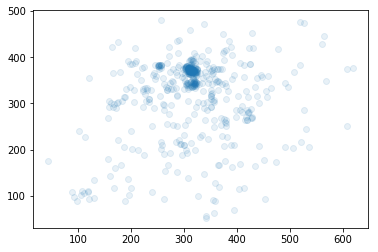

In [136]:
plt.scatter(okk["f2_x1"],okk["f2_y1"],alpha=0.1)

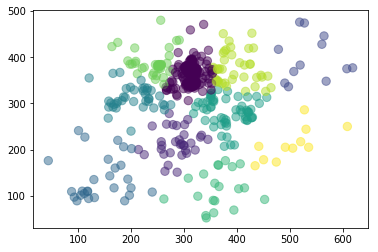

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(okk)
plt.scatter(okk["f2_x1"], okk["f2_y1"], c=kmeans.labels_, s=70, alpha=0.5)



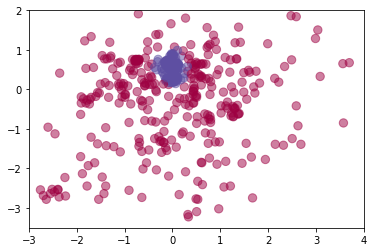

In [138]:
stat=df["break_pinpoint_recoded_f2"].value_counts(normalize=True)


X=StandardScaler().fit_transform(okk)
db = DBSCAN(eps=0.2, metric="euclidean", min_samples=50, algorithm="auto").fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

plt.scatter(X[:,0],X[:,1], c=db.labels_, s=70, alpha=0.5, cmap="Spectral")
plt.Circle((0,0.5),2,color='r',fill=False)
plt.xlim(-3,4)
plt.ylim(-3.5,2);


In [139]:
DBSCAN?

In [140]:
cv=pd.Series(labels)


In [141]:
cv=pd.DataFrame(cv)
cv=cv.set_index([np.arange(1,512,1)])
cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 1 to 511
Data columns (total 1 columns):
0    511 non-null int64
dtypes: int64(1)
memory usage: 8.0 KB


In [142]:
dd2=df.join(cv, how="inner")

In [143]:
dd2.iloc[:,-1]=dd2.iloc[:,-1]+1
dd2.iloc[:,-1].value_counts()

0    312
1    199
Name: 0, dtype: int64

In [144]:
dd2.tail(50)

,X...id,f1,f2_x1,f2_y1,break_pinpoint_recoded_f2,f4_r1,f4_r2,f4_r3,f4_r4,f4_r5,f4_r6,f4_r7,f4_r8,f4_r9,f4_r10,f7_r1,f7_r2,f7_r3,f7_r4,f7_r5,f7_r6,f7_r7,f7_r8,f7_r9,f7_r10,f7_r11,f7_r12,f7_r13,f7_r14,f7_r15,f8,f9_r1,f9_r2,f9_r3,f9_r4,f9_r5,f9_r6,f9_r7,f9_r8,f9_r9,f9_r10,f9_r11,f9_r12,f9_r13,f9_r14,f9_r15,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f10_7,f10_8,f10_9,f10_10,f10_11,f10_12,f10_13_other,f11_r1_Bike,f11_r2_Solarpanel,f11_r3_Wasser,f11_r4_Ski,f12a1_1_Bike,f12a1_kat_Bike,f13a1_a1_Bike,f13a1_a2_Bike,f13a1_wn_1_Bike,f13a1kat_Bike_estimated_product_price,f14_f15_combined_pb_ebike_1,f14_f15_combined_pb_ebike_2,f14_f15_combined_pb_ebike_3,f14_f15_combined_pb_ebike_4,f14_f15_combined_pb_ebike_5,f14_f15_combined_pb_ebike_6,f14_f15_combined_pb_ebike_7,f14_f15_combined_pb_ebike_8,f16a1_a1_Bike,f16a1_a2_Bike,f16a1_a3_Bike,f12a2_1_Solarpanel,f12a2_kat_Solarpanel,f13a2_a1_Solarpanel,f13a2_a2_Solarpanel,f13a2_wn_1_Solarpanel,f13a2kat_Solarpanel_estimated_product_price,f14_f15_combined_pb_panel_1,f14_f15_combined_pb_panel_2,f14_f15_combined_pb_panel_3,f14_f15_combined_pb_panel_4,...,f14_f15_combined_pb_panel_7,f14_f15_combined_pb_panel_8,f16a2_a1_Solarpanel,f16a2_a2_Solarpanel,f16a2_a3_Solarpanel,f12a3_1_Wasser,f12a3_kat_Wasser,f13a3_a1_Wasser,f13a3_a2_Wasser,f13a3_wn_1_Wasser,f13a3kat_Wasser_estimated_product_price,f14_f15_combined_pb_wasser_1,f14_f15_combined_pb_wasser_2,f14_f15_combined_pb_wasser_3,f14_f15_combined_pb_wasser_4,f14_f15_combined_pb_wasser_5,f14_f15_combined_pb_wasser_6,f14_f15_combined_pb_wasser_7,f14_f15_combined_pb_wasser_8,f16a3_a1_Wasser,f16a3_a2_Wasser,f16a3_a3_Wasser,f12a4_1_Ski,f12a4_kat_Ski,f13a4_a1_Ski,f13a4_a2_Ski,f13a4_wn_1_Ski,f13a4kat_Ski_estimated_product_price,f14_f15_combined_pb_ski_1,f14_f15_combined_pb_ski_2,f14_f15_combined_pb_ski_3,f14_f15_combined_pb_ski_4,f14_f15_combined_pb_ski_5,f14_f15_combined_pb_ski_6,f14_f15_combined_pb_ski_7,f14_f15_combined_pb_ski_8,f16a4_a1_Ski,f16a4_a2_Ski,f16a4_a3_Ski,f17,f18,f19_1,f19_2,f19_3,f19_4,f19_5,f19_6,f19_7,f19_8,f19_9,f19_10,f19_9_other,f20_1,f20_2,f20_3,f20_4,f20_5,f20_6,f20_7,f20_8,f20_9,f20_10,f20_9_other,f21_r1,f22_r1,f22_r2,f22_r3,f22_r4,f22_r5,f22_r6,f22_r7,f22_r8,f22_r9,f22_r10,f22_r11,f22_r12,break_COO_recoded_f22,d1,d2,d3,d3_kat,d4,d5,d6,d6_kat,d7,d8,age_kat,break_treatment,0
462,10433,1,277.0,349.0,1,4,1,2,2,2,1,2,1,4,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,,2,3,1,1,97.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,,,,98.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,0.0,...,0.0,0.0,,,,86.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,,,,100.0,5.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,???,,,1,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,5,1,1,1,1,1,1,1,1,1,1,1,3,1,1,NaN,3,3,55,4,1,3,1,3,3,2,0
463,10436,1,270.0,166.0,0,3,1,1,1,2,1,3,2,3,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,2,2,1,2,89.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,,,,100.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,,,,87.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,,,,100.0,5.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,,,,2,1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,5,1,1,1,1,1,1,1,1,1,1,1,2,1,2,NaN,5,4,51,4,6,1,1,1,3,3,0
464,10442,1,267.0,328.0,0,4,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,3,3,3,3,45.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,???,,,53.0,3.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,?????,,,46.0,3.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,52.0,3.0,NaN,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,,1,3,3,3,3,3,3,3,3,3,3,3,3,

In [128]:
X2=dd2._get_numeric_data()

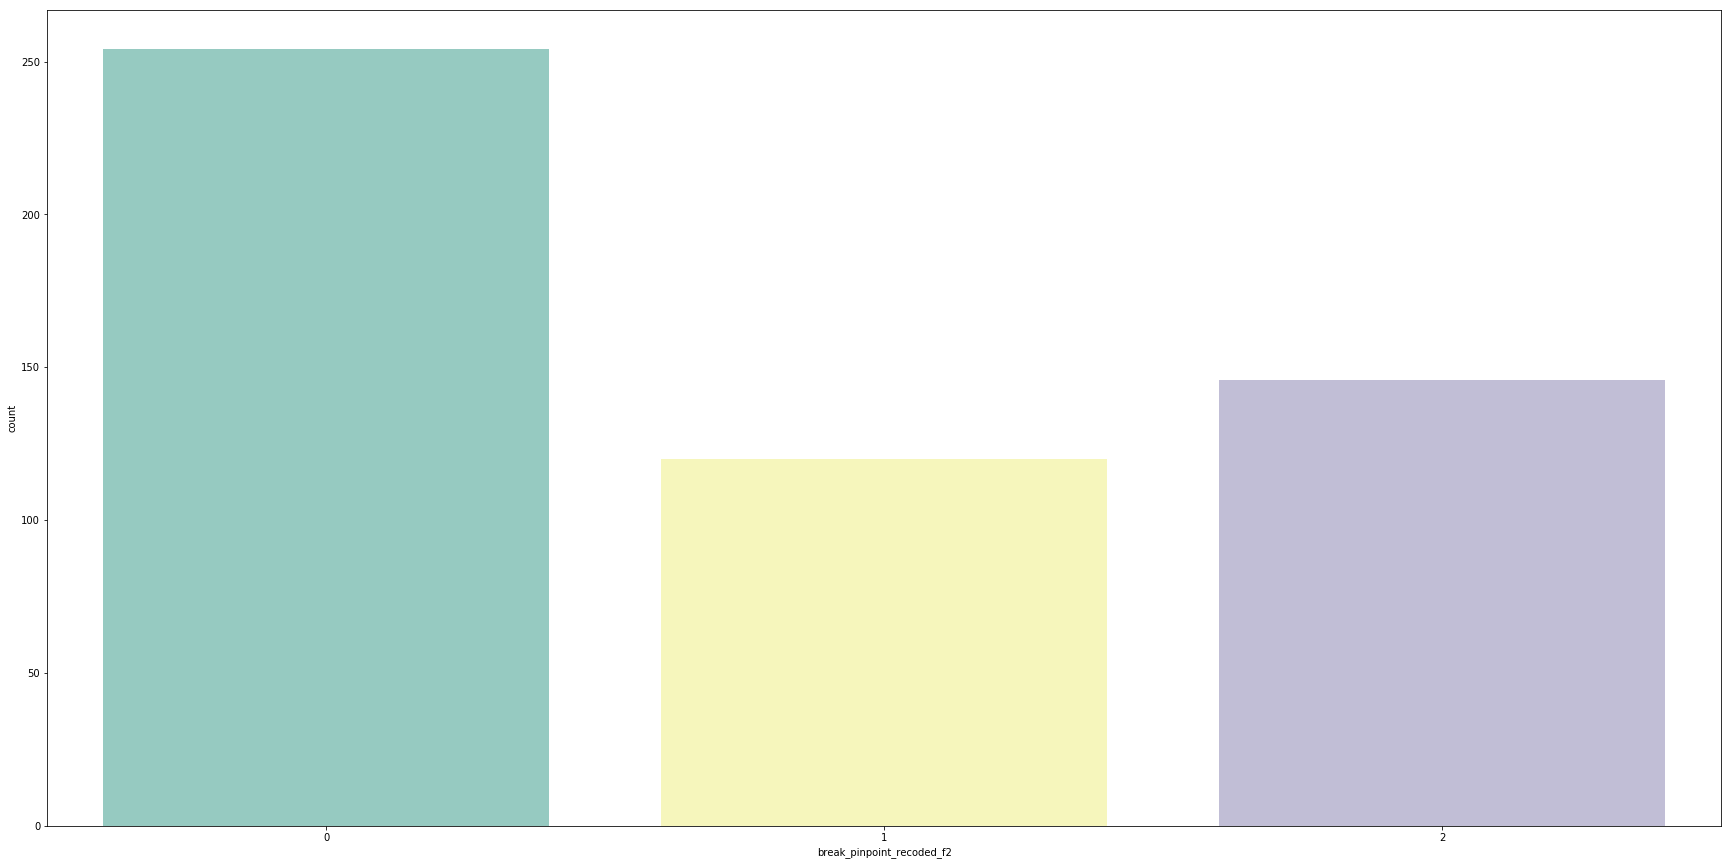

In [74]:
pylab.figure(figsize=(30,15))
gg=sns.countplot(df.break_pinpoint_recoded_f2, palette="Set3")
pylab.savefig('pairplot.png')

In [38]:
WP2=df.loc[:,"f20_1":"f20_10"]


In [10]:
WP2.fillna(0);

WP2n=pd.concat([WP2.fillna(0), df.iloc[:,-1]], axis=1)
WP2n.head()

,f19_1,f19_2,f19_3,f19_4,f19_5,f19_6,f19_7,f19_8,f19_9,f19_10,break_treatment
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


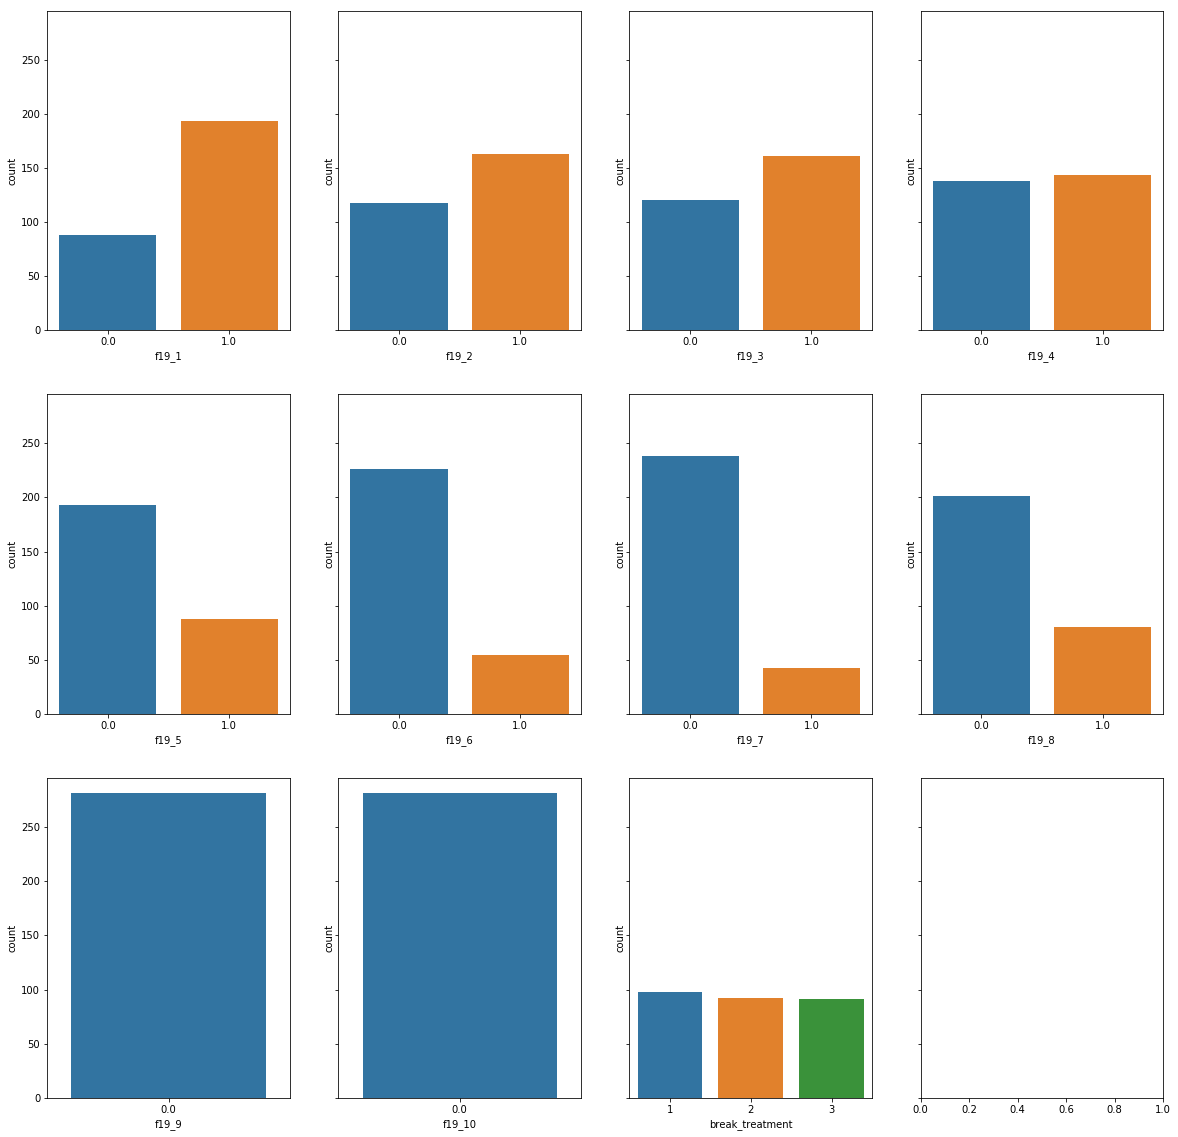

In [260]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20), sharey=True)
for i in np.arange(0,11,1):
    sns.countplot(x=WP2n.columns[i], data=WP2n, ax=axes[i / 4, i % 4])
    

AttributeError: 'str' object has no attribute 'value_counts'

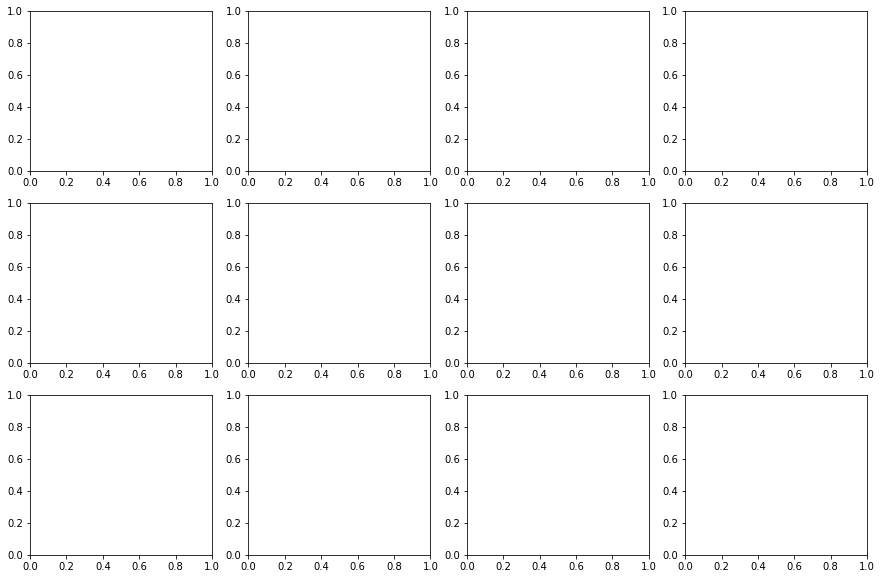

In [249]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, feature in enumerate(WP2n.columns[:-1]):
  plt.plot(feature.value_counts())


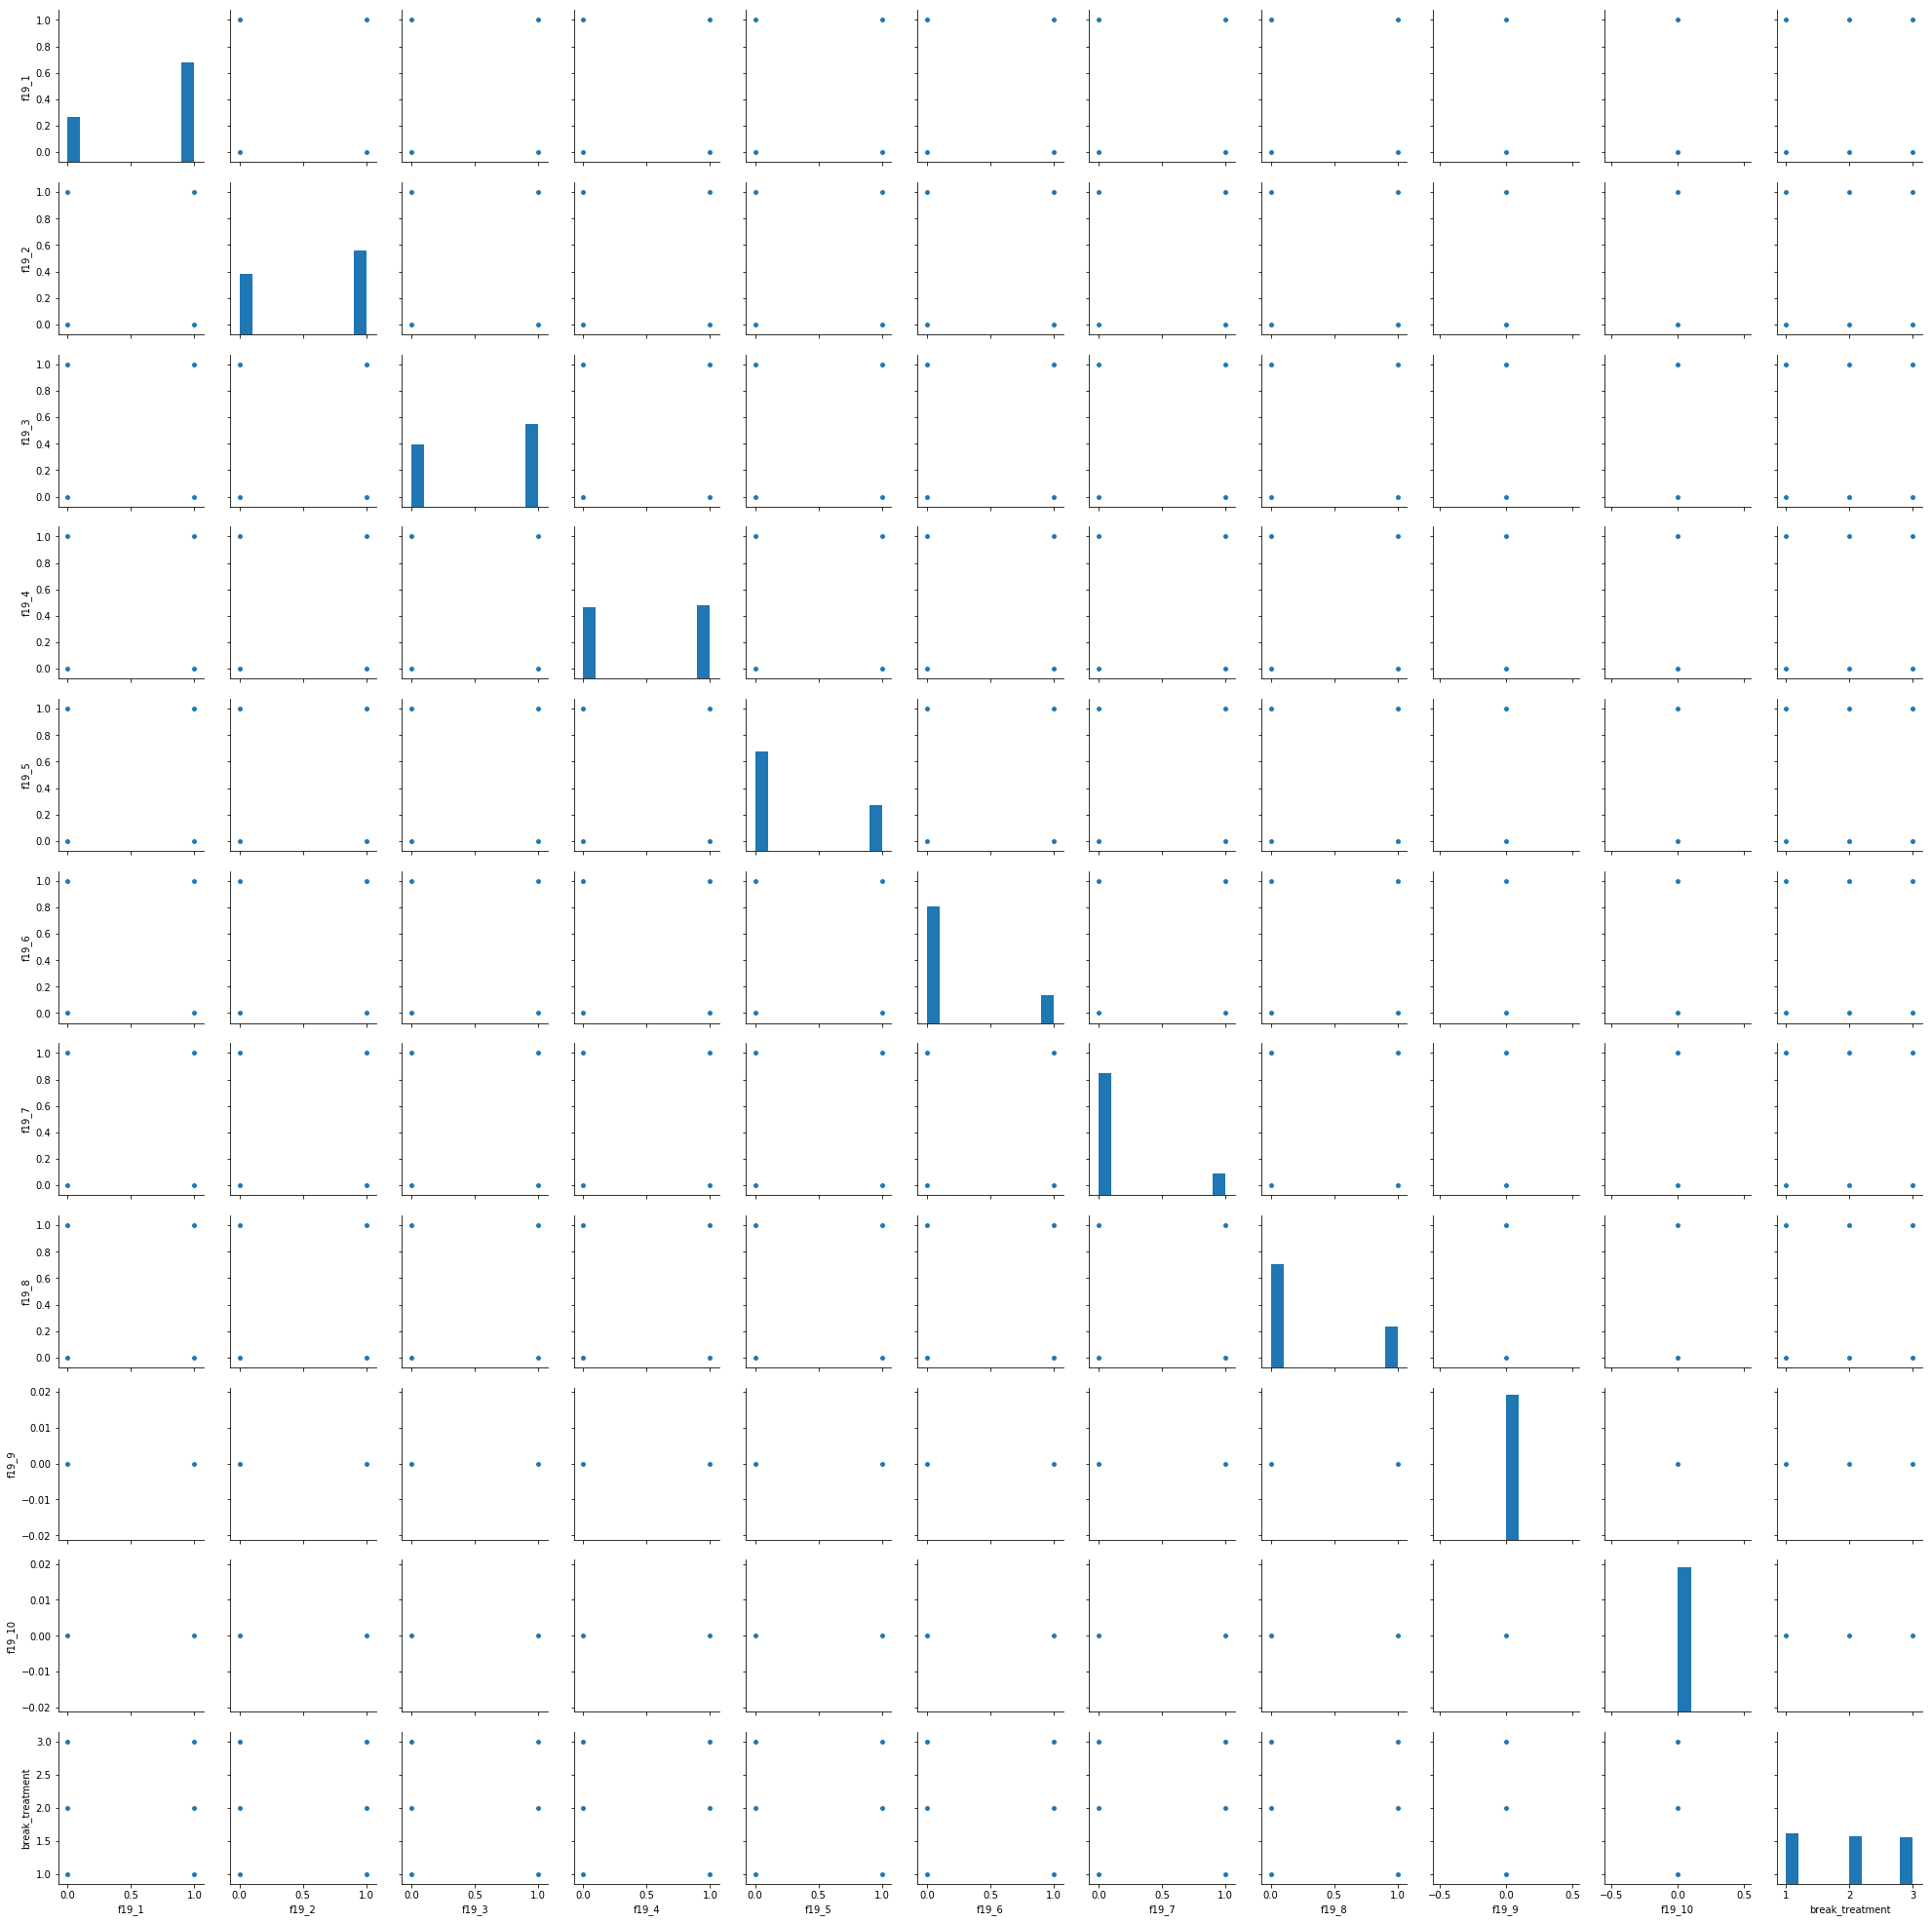

In [246]:
sns.pairplot(WP2n)

In [239]:
for i in np.arange(0,11,1):
    print(WP2n.iloc[:,i].sum())

193.0
163.0
161.0
143.0
88.0
55.0
43.0
80.0
0.0
0.0
555


In [235]:
WP2n.sum()

f19_1              193.0
f19_2              163.0
f19_3              161.0
f19_4              143.0
f19_5               88.0
f19_6               55.0
f19_7               43.0
f19_8               80.0
f19_9                0.0
f19_10               0.0
break_treatment    555.0
dtype: float64

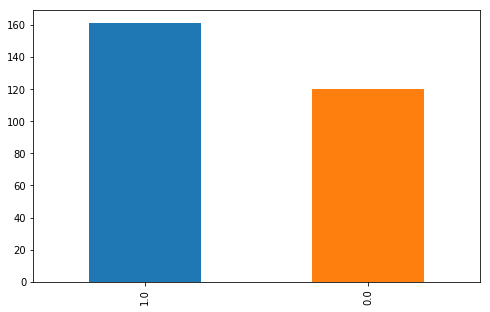

In [241]:
WP2n.f19_3.value_counts().plot(kind="bar")

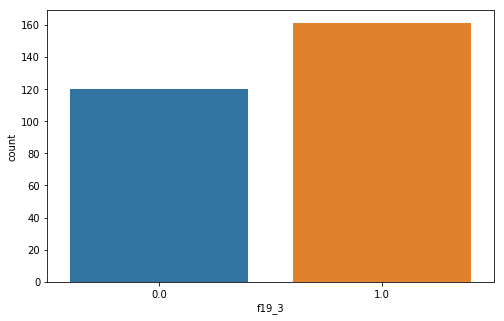

In [255]:
sns.countplot(x=WP2n.columns[2], data=WP2n)

In [139]:
WP2=WP2.fillna(value="0")

In [141]:
(WP2.sum()/500).sort_values(ascending=False)

Series([], dtype: float64)

In [24]:
(WP2.sum()).sort_values(ascending=False)

f20_7     52.0
f20_10    29.0
f20_6     29.0
f20_9     11.0
f20_3      8.0
f20_2      5.0
f20_8      4.0
f20_4      3.0
f20_5      2.0
f20_1      2.0
dtype: float64

In [168]:
feat=df.iloc[:,2:5]


In [264]:
dfn=pd.concat([df["f2_x1"],df["f2_y1"], df.iloc[:,180]], axis=1 )
dfn.head()

,f2_x1,f2_y1,break_treatment
1,324.0,361.0,3
3,325.0,372.0,2
4,323.0,369.0,3
5,302.0,374.0,3
7,312.0,371.0,3


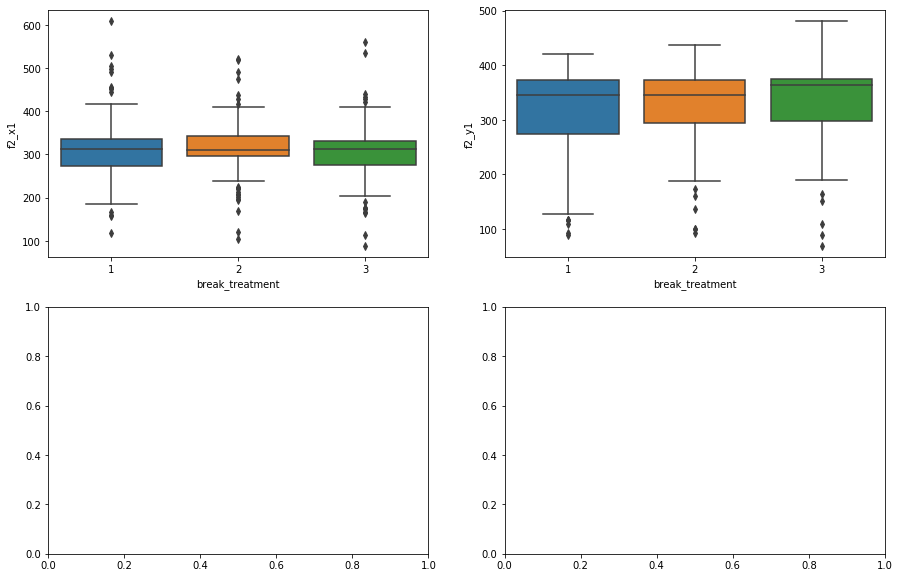

In [278]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for idx, feat in enumerate(dfn.columns[:-1]):
    sns.boxplot(x="break_treatment", y=feat, data=dfn, ax=axes[idx / 2, idx % 2])

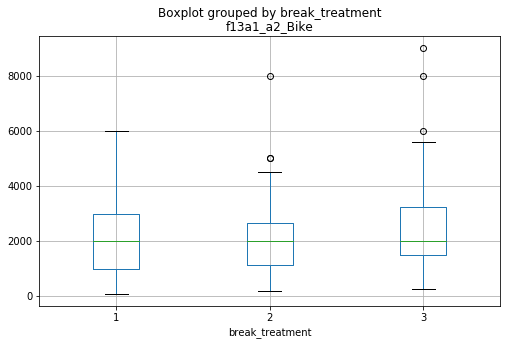

In [120]:
df=df[df["f13a1_a2_Bike"]<25000]
df.boxplot(column="f13a1_a2_Bike", by="break_treatment")


In [7]:
list(df)

['X...id',
 'f1',
 'f2_x1',
 'f2_y1',
 'break_pinpoint_recoded_f2',
 'f4_r1',
 'f4_r2',
 'f4_r3',
 'f4_r4',
 'f4_r5',
 'f4_r6',
 'f4_r7',
 'f4_r8',
 'f4_r9',
 'f4_r10',
 'f7_r1',
 'f7_r2',
 'f7_r3',
 'f7_r4',
 'f7_r5',
 'f7_r6',
 'f7_r7',
 'f7_r8',
 'f7_r9',
 'f7_r10',
 'f7_r11',
 'f7_r12',
 'f7_r13',
 'f7_r14',
 'f7_r15',
 'f8',
 'f9_r1',
 'f9_r2',
 'f9_r3',
 'f9_r4',
 'f9_r5',
 'f9_r6',
 'f9_r7',
 'f9_r8',
 'f9_r9',
 'f9_r10',
 'f9_r11',
 'f9_r12',
 'f9_r13',
 'f9_r14',
 'f9_r15',
 'f10_1',
 'f10_2',
 'f10_3',
 'f10_4',
 'f10_5',
 'f10_6',
 'f10_7',
 'f10_8',
 'f10_9',
 'f10_10',
 'f10_11',
 'f10_12',
 'f10_13_other',
 'f11_r1_Bike',
 'f11_r2_Solarpanel',
 'f11_r3_Wasser',
 'f11_r4_Ski',
 'f12a1_1_Bike',
 'f12a1_kat_Bike',
 'f13a1_a1_Bike',
 'f13a1_a2_Bike',
 'f13a1_wn_1_Bike',
 'f13a1kat_Bike_estimated_product_price',
 'f14_f15_combined_pb_ebike_1',
 'f14_f15_combined_pb_ebike_2',
 'f14_f15_combined_pb_ebike_3',
 'f14_f15_combined_pb_ebike_4',
 'f14_f15_combined_pb_ebike_5',
 'f14_f

In [110]:

def xs(i):
    plt.plot(df[df["break_treatment"]==i]["f14_f15_combined_pb_ebike_1"].value_counts())

In [114]:
fear=list(["f14_f15_combined_pb_ebike_1"],["f14_f15_combined_pb_ebike_2"])

TypeError: list() takes at most 1 argument (2 given)

In [104]:
for i in np.arange(1,4,1):
    print(df[df["break_treatment"]==i]["f14_f15_combined_pb_ebike_1"].value_counts(normalize=True))

1.0    0.912568
0.0    0.087432
Name: f14_f15_combined_pb_ebike_1, dtype: float64
1.0    0.87037
0.0    0.12963
Name: f14_f15_combined_pb_ebike_1, dtype: float64
1.0    0.878613
0.0    0.121387
Name: f14_f15_combined_pb_ebike_1, dtype: float64


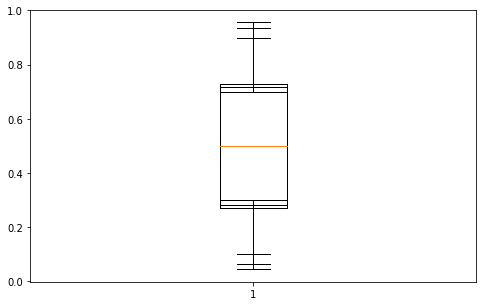

In [128]:
for i in np.arange(1,4,1):
    plt.boxplot((df[df["break_treatment"]==i]["f14_f15_combined_pb_ebike_1"]).value_counts(normalize=True))

In [159]:
df.columns

Index([u'X...id', u'f1', u'f2_x1', u'f2_y1', u'break_pinpoint_recoded_f2',
       u'f4_r1', u'f4_r2', u'f4_r3', u'f4_r4', u'f4_r5',
       ...
       u'd3', u'd3_kat', u'd4', u'd5', u'd6', u'd6_kat', u'd7', u'd8',
       u'age_kat', u'break_treatment'],
      dtype='object', length=181)

In [88]:
ww1["f14_f15_combined_pb_ebike_1"].sum()

167.0

In [55]:
df["break_treatment"].value_counts()
df[df['Churn'] == 1].mean()

1    184
3    174
2    162
Name: break_treatment, dtype: int64

In [7]:
 hz7kr7,

In [27]:
xxx=pd.DataFrame(WP2.mean())
xxx.rename(columns={'% of respondents':'Yes/No'},
inplace=True)

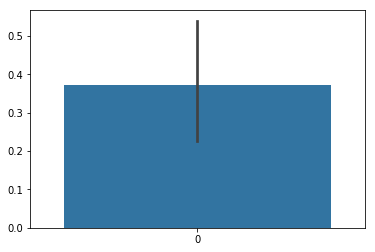

In [31]:
sns.barplot( data=xxx)

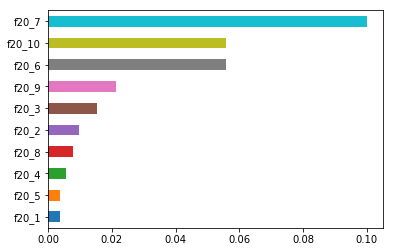

In [41]:
(WP2.sum()/520).sort_values(ascending=True).plot(kind="barh")

In [44]:
(WP2.sum()/520).sort_values(ascending=False)



f20_7     0.100000
f20_10    0.055769
f20_6     0.055769
f20_9     0.021154
f20_3     0.015385
f20_2     0.009615
f20_8     0.007692
f20_4     0.005769
f20_5     0.003846
f20_1     0.003846
dtype: float64

In [1]:
plot?


Object `plot` not found.


In [62]:
xk1.plot?

In [71]:
WP2.to_csv("noi.csv")

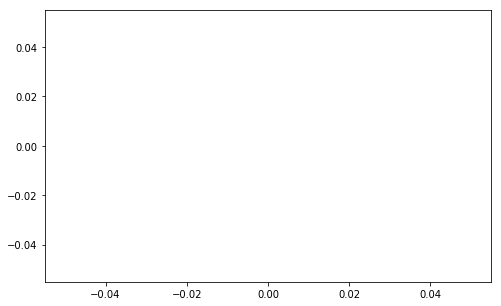

In [145]:
plt.plot(xk1)

In [13]:
list(df)

['X...id',
 'f1',
 'f2_x1',
 'f2_y1',
 'break_pinpoint_recoded_f2',
 'f4_r1',
 'f4_r2',
 'f4_r3',
 'f4_r4',
 'f4_r5',
 'f4_r6',
 'f4_r7',
 'f4_r8',
 'f4_r9',
 'f4_r10',
 'f7_r1',
 'f7_r2',
 'f7_r3',
 'f7_r4',
 'f7_r5',
 'f7_r6',
 'f7_r7',
 'f7_r8',
 'f7_r9',
 'f7_r10',
 'f7_r11',
 'f7_r12',
 'f7_r13',
 'f7_r14',
 'f7_r15',
 'f8',
 'f9_r1',
 'f9_r2',
 'f9_r3',
 'f9_r4',
 'f9_r5',
 'f9_r6',
 'f9_r7',
 'f9_r8',
 'f9_r9',
 'f9_r10',
 'f9_r11',
 'f9_r12',
 'f9_r13',
 'f9_r14',
 'f9_r15',
 'f10_1',
 'f10_2',
 'f10_3',
 'f10_4',
 'f10_5',
 'f10_6',
 'f10_7',
 'f10_8',
 'f10_9',
 'f10_10',
 'f10_11',
 'f10_12',
 'f10_13_other',
 'f11_r1_Bike',
 'f11_r2_Solarpanel',
 'f11_r3_Wasser',
 'f11_r4_Ski',
 'f12a1_1_Bike',
 'f12a1_kat_Bike',
 'f13a1_a1_Bike',
 'f13a1_a2_Bike',
 'f13a1_wn_1_Bike',
 'f13a1kat_Bike_estimated_product_price',
 'f14_f15_combined_pb_ebike_1',
 'f14_f15_combined_pb_ebike_2',
 'f14_f15_combined_pb_ebike_3',
 'f14_f15_combined_pb_ebike_4',
 'f14_f15_combined_pb_ebike_5',
 'f14_f

In [56]:
df[df["break_treatment"]==2]["f14_f15_combined_pb_ski_1"]

2      1.0
3      1.0
9      1.0
23     1.0
27     1.0
35     1.0
39     1.0
40     1.0
43     1.0
46     1.0
48     1.0
49     1.0
51     1.0
52     1.0
55     1.0
56     1.0
57     1.0
60     1.0
61     1.0
64     1.0
68     1.0
69     1.0
74     1.0
75     1.0
77     0.0
81     1.0
82     1.0
86     1.0
92     1.0
94     0.0
      ... 
414    0.0
422    0.0
423    1.0
428    0.0
429    1.0
430    1.0
431    0.0
433    0.0
437    0.0
442    0.0
451    1.0
456    0.0
457    1.0
460    1.0
461    1.0
462    0.0
467    1.0
476    0.0
477    1.0
481    1.0
482    0.0
485    0.0
491    1.0
497    1.0
500    1.0
501    1.0
507    0.0
508    0.0
511    1.0
516    1.0
Name: f14_f15_combined_pb_ski_1, Length: 162, dtype: float64

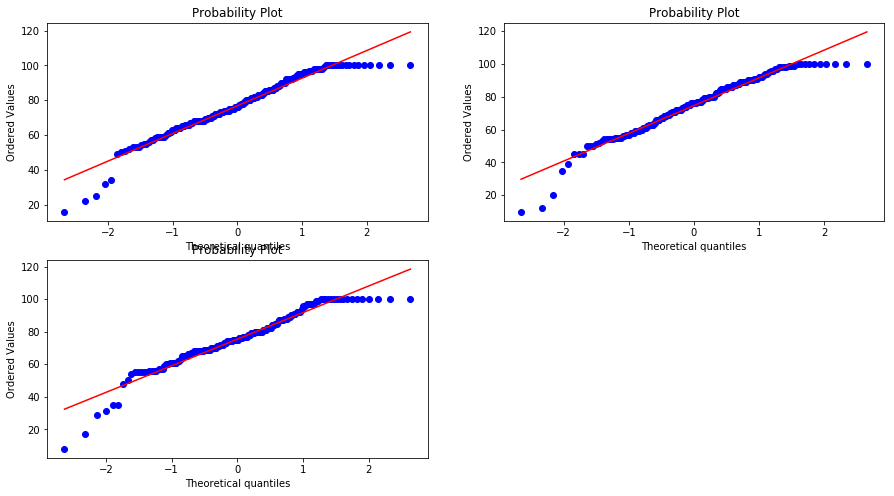

In [68]:
pylab.figure(figsize=(15,8))
pylab.subplot(2,2,1)
stats.probplot(df[df["break_treatment"]==1]["f12a1_1_Bike"].dropna(0), dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(df[df["break_treatment"]==3]["f12a1_1_Bike"].dropna(0), dist="norm", plot=pylab)
pylab.subplot(2,2,3)
stats.probplot(df[df["break_treatment"]==2]["f12a1_1_Bike"].dropna(0), dist="norm", plot=pylab)
g=pylab.show()

In [69]:
g.savefig('pairplot.png')

AttributeError: 'NoneType' object has no attribute 'savefig'

In [40]:
for i in np.arange(1,4,1):
    print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[df["break_treatment"]==i]["f12a1_1_Bike"].dropna(0))

Shapiro-Wilk normality test, W-statistic: 0.947104, p-value: 0.000003
Shapiro-Wilk normality test, W-statistic: 0.939395, p-value: 0.000002
Shapiro-Wilk normality test, W-statistic: 0.950258, p-value: 0.000009


In [39]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(df[df["break_treatment"]==2]["f12a1_1_Bike"].dropna(0))

Shapiro-Wilk normality test, W-statistic: 0.950258, p-value: 0.000009


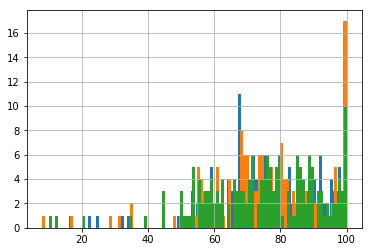

In [77]:
for i in np.arange(1,4,1):
    df[df["break_treatment"]==i]["f12a1_1_Bike"].dropna(0).hist(bins=100)

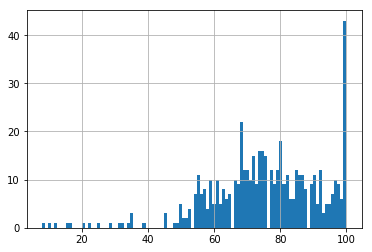

In [76]:

df["f12a1_1_Bike"].hist(bins=100)

In [ ]:
df["f12a1_1_Bike"].hist

SyntaxError: invalid syntax (<ipython-input-55-0573e9c1c4e6>, line 1)

In [88]:
df.groupby("break_treatment")["f12a1_1_Bike"].agg([np.sum,np.mean]).rename(columns={"sum": "mvk", "mean": "cdc"})

,mvk,cdc
break_treatment,,
1,14050.0,76.775956
2,12217.0,75.413580
3,12913.0,74.641618


In [91]:
df.groupby("break_treatment")[("f12a1_1_Bike","f14_f15_combined_pb_wasser_1")].agg({"f12a1_1_Bike" :np.sum, "f14_f15_combined_pb_wasser_1": np.mean})

,f12a1_1_Bike,f14_f15_combined_pb_wasser_1
break_treatment,,
1,14050.0,0.967213
2,12217.0,0.969136
3,12913.0,0.948276


In [92]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100,min_periods=100).mean().dropna()

In [93]:
ts.head()


2000-01-08    0.512468
2000-01-09    0.524965
2000-01-10    0.585909
2000-01-11    0.536514
2000-01-12    0.533252
Freq: D, dtype: float64

In [98]:
key = lambda x: x.month

In [95]:
zscore = lambda x: (x - x.mean()) / x.std()

In [99]:
transformed = ts.groupby(key)

In [101]:
data_range = lambda x: x.max() - x.min()

In [105]:
df.groupby("break_treatment")["f12a1_1_Bike"].max()-df.groupby("break_treatment")["f12a1_1_Bike"].min()

break_treatment
1    84.0
2    92.0
3    90.0
Name: f12a1_1_Bike, dtype: float64

In [109]:
f = lambda x: x.fillna(x.mean())

In [110]:
df.groupby("break_treatment")["f13a1_a1_Bike"].transform(f)

1      2295.000000
2      8400.000000
3      1986.952381
4      2295.000000
5      2295.000000
6      5500.000000
7      2295.000000
8      5000.000000
9      1986.952381
10     2295.000000
11     2481.818182
12     2481.818182
13     2481.818182
14     2481.818182
15     2295.000000
16     2481.818182
17     2295.000000
18     2481.818182
19     2295.000000
20     3800.000000
21     2295.000000
22     2295.000000
23     1986.952381
24     3500.000000
25     2481.818182
26     2295.000000
27     1986.952381
28     2481.818182
29     2481.818182
30     2481.818182
          ...     
491    1986.952381
492    2295.000000
493    2481.818182
494    2481.818182
495    2481.818182
496    2295.000000
497    1986.952381
498    2295.000000
499    2295.000000
500    1986.952381
501    1986.952381
502    2481.818182
503    2295.000000
504    2481.818182
505    2295.000000
506    2295.000000
507    1986.952381
508    1986.952381
509    2295.000000
510    2481.818182
511    1986.952381
512    2481.

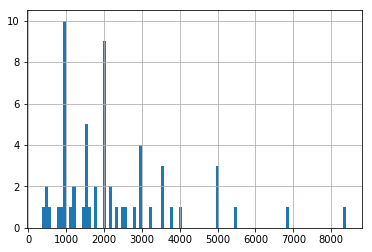

In [115]:
df["f13a1_a1_Bike"].hist(bins=100)

In [116]:
df.groupby("break_treatment")["f13a1_a1_Bike"].count()

break_treatment
1    22
2    21
3    16
Name: f13a1_a1_Bike, dtype: int64

In [117]:
df.groupby("break_treatment")["f13a1_a1_Bike"].size()

break_treatment
1    184
2    162
3    174
Name: f13a1_a1_Bike, dtype: int64

In [123]:
df.groupby("break_treatment")["f13a1_a1_Bike"].apply(lambda x:x**2).dropna()

2      70560000.0
6      30250000.0
8      25000000.0
20     14440000.0
24     12250000.0
48      6250000.0
56      4000000.0
64      4000000.0
77      2250000.0
150     1000000.0
152    46240000.0
158    25000000.0
160    25000000.0
169    16000000.0
180    12390400.0
184    12250000.0
191    10240000.0
192     9000000.0
194     9000000.0
204     9000000.0
210     9000000.0
220     7840000.0
223     6760000.0
236     5290000.0
239     4840000.0
240     4840000.0
248     4000000.0
250     4000000.0
251     4000000.0
265     4000000.0
267     4000000.0
277     4000000.0
280     4000000.0
287     3240000.0
289     3240000.0
293     2560000.0
296     2250000.0
300     2250000.0
303     2250000.0
312     2250000.0
317     2102500.0
322     1440000.0
325     1440000.0
328     1210000.0
333     1000000.0
334     1000000.0
335     1000000.0
336     1000000.0
338     1000000.0
342     1000000.0
343     1000000.0
345     1000000.0
346     1000000.0
349      810000.0
353      640000.0
363      3

In [170]:
X.ix[:,:-1].corrwith(X["f13a1_a1_Bike"])

X...id                       0.185655
f1                          -0.021268
f2_x1                        0.095571
f2_y1                       -0.022054
break_pinpoint_recoded_f2    0.265362
f4_r1                       -0.309949
f4_r2                       -0.222029
f4_r3                       -0.182811
f4_r4                       -0.232821
f4_r5                       -0.191069
f4_r6                       -0.269649
f4_r7                       -0.045732
f4_r8                        0.203781
f4_r9                        0.034234
f4_r10                      -0.062030
f7_r1                       -0.036360
f7_r2                       -0.001481
f7_r3                       -0.131745
f7_r4                       -0.175627
f7_r5                       -0.185976
f7_r6                       -0.138532
f7_r7                       -0.045352
f7_r8                       -0.111157
f7_r9                        0.000305
f7_r10                       0.023305
f7_r11                      -0.195253
f7_r12      

In [154]:
cc[cc>0.3]

f10_5                                    0.398148
f10_11                                   0.489339
f13a1_a1_Bike                            1.000000
f13a1kat_Bike_estimated_product_price    0.671758
f14_f15_combined_pb_ebike_3              0.358575
f14_f15_combined_pb_ebike_4              0.357535
f14_f15_combined_pb_ebike_5              0.421745
f14_f15_combined_pb_ebike_6              0.444121
f14_f15_combined_pb_ebike_7              0.341918
f14_f15_combined_pb_ebike_8              0.429212
f13a3_a2_Wasser                          0.674635
f13a4_a2_Ski                             0.498162
f19_6                                    0.332360
f20_10                                   0.631086
dtype: float64

In [159]:
feat=list(sss.index)

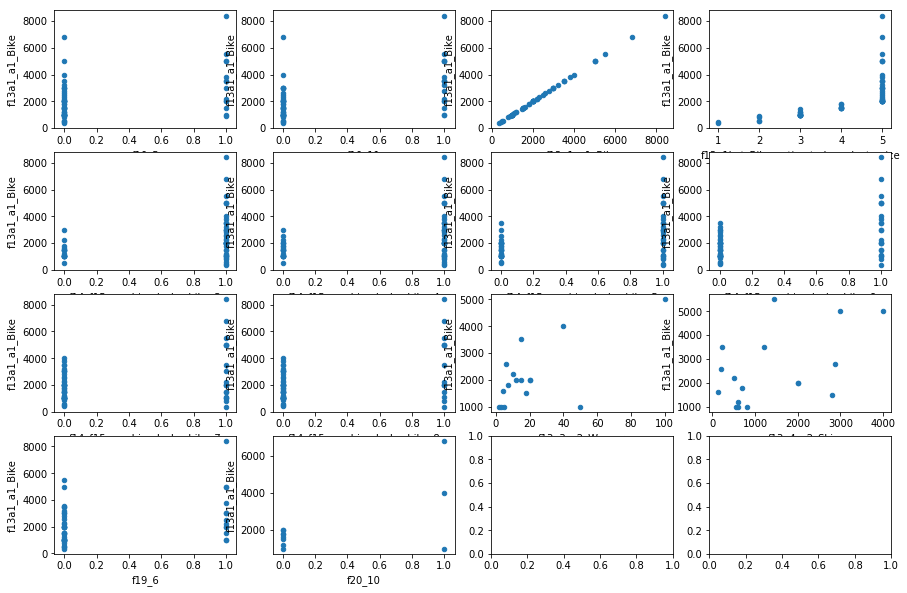

In [168]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for idx, featur in enumerate(feat):
    df.plot(featur, "f13a1_a1_Bike", subplots=True, kind="scatter", ax=axes[idx / 4, idx % 4])

In [171]:
def square(f): # на вход – функция
# выход - функция,
# которая будет реально выполняться
    return lambda x: f(x * x)

In [132]:
X2=X2.dropna()
X2.head(50)

,X...id,f1,f2_x1,f2_y1,break_pinpoint_recoded_f2,f4_r1,f4_r2,f4_r3,f4_r4,f4_r5,f4_r6,f4_r7,f4_r8,f4_r9,f4_r10,f7_r1,f7_r2,f7_r3,f7_r4,f7_r5,f7_r6,f7_r7,f7_r8,f7_r9,f7_r10,f7_r11,f7_r12,f7_r13,f7_r14,f7_r15,f8,f9_r1,f9_r2,f9_r3,f9_r4,f9_r5,f9_r6,f9_r7,f9_r8,f9_r9,f9_r10,f9_r11,f9_r12,f9_r13,f9_r14,f9_r15,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f10_7,f10_8,f10_9,f10_10,f10_11,f10_12,f11_r1_Bike,f11_r2_Solarpanel,f11_r3_Wasser,f11_r4_Ski,f12a1_1_Bike,f12a1_kat_Bike,f13a1_a1_Bike,f13a1_a2_Bike,f13a1_wn_1_Bike,f13a1kat_Bike_estimated_product_price,f14_f15_combined_pb_ebike_1,f14_f15_combined_pb_ebike_2,f14_f15_combined_pb_ebike_3,f14_f15_combined_pb_ebike_4,f14_f15_combined_pb_ebike_5,f14_f15_combined_pb_ebike_6,f14_f15_combined_pb_ebike_7,f14_f15_combined_pb_ebike_8,f12a2_1_Solarpanel,f12a2_kat_Solarpanel,f13a2_a1_Solarpanel,f13a2_a2_Solarpanel,f13a2_wn_1_Solarpanel,f13a2kat_Solarpanel_estimated_product_price,f14_f15_combined_pb_panel_1,f14_f15_combined_pb_panel_2,f14_f15_combined_pb_panel_3,f14_f15_combined_pb_panel_4,f14_f15_combined_pb_panel_5,f14_f15_combined_pb_panel_6,f14_f15_combined_pb_panel_7,f14_f15_combined_pb_panel_8,f12a3_1_Wasser,f12a3_kat_Wasser,f13a3_a1_Wasser,f13a3_a2_Wasser,f13a3_wn_1_Wasser,f13a3kat_Wasser_estimated_product_price,f14_f15_combined_pb_wasser_1,f14_f15_combined_pb_wasser_2,f14_f15_combined_pb_wasser_3,f14_f15_combined_pb_wasser_4,f14_f15_combined_pb_wasser_5,f14_f15_combined_pb_wasser_6,f14_f15_combined_pb_wasser_7,f14_f15_combined_pb_wasser_8,f12a4_1_Ski,f12a4_kat_Ski,f13a4_a1_Ski,f13a4_a2_Ski,f13a4_wn_1_Ski,f13a4kat_Ski_estimated_product_price,f14_f15_combined_pb_ski_1,f14_f15_combined_pb_ski_2,f14_f15_combined_pb_ski_3,f14_f15_combined_pb_ski_4,f14_f15_combined_pb_ski_5,f14_f15_combined_pb_ski_6,f14_f15_combined_pb_ski_7,f14_f15_combined_pb_ski_8,f17,f18,f19_1,f19_2,f19_3,f19_4,f19_5,f19_6,f19_7,f19_8,f19_9,f19_10,f20_1,f20_2,f20_3,f20_4,f20_5,f20_6,f20_7,f20_8,f20_9,f20_10,f21_r1,f22_r1,f22_r2,f22_r3,f22_r4,f22_r5,f22_r6,f22_r7,f22_r8,f22_r9,f22_r10,f22_r11,f22_r12,break_COO_recoded_f22,d1,d2,d3,d3_kat,d4,d5,d6,d6_kat,d7,d8,age_kat,break_treatment,0


In [147]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X2)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.title('MNIST. t-SNE projection')

ValueError: Found array with 0 sample(s) (shape=(0, 167)) while a minimum of 1 is required.

In [112]:
dfa=df.drop("age_kat", axis=1)
a=list(dfa)

In [113]:
df.groupby(["d1", "break_treatment"])[a].mean()

X...id        f1       f2_x1       f2_y1  \
d1 break_treatment                                                   
1  1                10020.844660  1.000000  313.794118  318.098039   
   2                 9945.256098  1.012195  320.637500  324.725000   
   3                10173.442105  1.010526  312.648936  327.797872   
2  1                10169.925926  1.000000  326.135802  315.209877   
   2                10205.037500  1.012500  311.597403  317.623377   
   3                 9465.974684  1.012658  302.025974  319.805195   

                    break_pinpoint_recoded_f2     f4_r1     f4_r2     f4_r3  \
d1 break_treatment                                                            
1  1                                 0.834951  3.019417  1.854369  2.310680   
   2                                 0.817073  3.317073  1.780488  2.463415   
   3                                 0.947368  2.989474  1.852632  2.463158   
2  1                                 0.802469  2.777778  1.814815  2.271605   
   2                                 0.675000  2.737500  1.887500  2.225000   
   3                                 0.632911  2.632911  1.822785  2.240506   

                       f4_r4     f4_r5     f4_r6     f4_r7     f4_r8  \
d1 break_treatment                                                     
1  1                2.203883  1.844660  2.213592  2.708738  1.766990   
   2                2.146341  1.878049  2.170732  2.609756  1.585366   
   3                2.168421  1.852632  2.126316  2.736842  1.642105   
2  1                2.197531  1.777778  2.209877  2.604938  1.679012   
   2                2.075000  1.862500  2.237500  2.700000  1.687500   
   3                2.012658  1.759494  2.113924  2.594937  1.708861   

                       f4_r9    f4_r10     f7_r1     f7_r2     f7_r3  \
d1 break_treatment                                                     
1  1                3.669903  2.466019  2.485437  2.233010  1.796117   
   2                3.670732  2.390244  2.573171  2.280488  2.146341   
   3                3.589474  2.284211  2.926316  2.463158  1.926316   
2  1                3.382716  2.259259  2.864198  2.432099  2.049383   
   2                3.212500  2.237500  2.800000  2.512500  2.150000   
   3                3.240506  2.215190  2.658228  2.291139  1.924051   

                       f7_r4     f7_r5     f7_r6     f7_r7     f7_r8  \
d1 break_treatment                                                     
1  1                2.446602  2.524272  2.495146  2.650485  2.776699   
   2                2.487805  2.658537  2.768293  2.804878  2.768293   
   3                2.642105  2.757895  2.768421  2.936842  2.905263   
2  1                2.382716  2.691358  2.753086  3.024691  3.037037   
   2                2.625000  2.737500  2.787500  2.962500  2.875000   
   3                2.556962  2.645570  2.860759  2.873418  2.772152   

                       f7_r9    f7_r10    f7_r11    f7_r12    f7_r13  \
d1 break_treatment                                                     
1  1                2.504854  2.786408  2.320388  2.543689  2.300971   
   2                2.646341  2.878049  2.402439  2.548780  2.573171   
   3                2.789474  3.094737  2.442105  2.757895  2.715789   
2  1                2.716049  3.086420  2.518519  2.543210  2.580247   
   2                2.837500  3.012500  2.487500  2.700000  2.600000   
   3                2.696203  3.050633  2.417722  2.632911  2.569620   

                      f7_r14    f7_r15        f8     f9_r1     f9_r2  \
d1 break_treatment                                                     
1  1                2.271845  2.543689  1.669903  1.718447  1.961165   
   2                2.292683  2.487805  1.765432  1.567901  1.790123   
   3                2.515789  2.778947  1.744681  1.787234  1.872340   
2  1                2.592593  2.617284  1.679012  1.691358  2.024691   
   2                2.575000  2.775000  1.772152  1.759494  1.936709   
   3                

In [114]:
df.groupby(["break_treatment"])[a].mean()

,X...id,f1,f2_x1,f2_y1,break_pinpoint_recoded_f2,f4_r1,f4_r2,f4_r3,f4_r4,f4_r5,f4_r6,f4_r7,f4_r8,f4_r9,f4_r10,f7_r1,f7_r2,f7_r3,f7_r4,f7_r5,f7_r6,f7_r7,f7_r8,f7_r9,f7_r10,f7_r11,f7_r12,f7_r13,f7_r14,f7_r15,f8,f9_r1,f9_r2,f9_r3,f9_r4,f9_r5,f9_r6,f9_r7,f9_r8,f9_r9,f9_r10,f9_r11,f9_r12,f9_r13,f9_r14,f9_r15,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f10_7,f10_8,f10_9,f10_10,f10_11,f10_12,f11_r1_Bike,f11_r2_Solarpanel,f11_r3_Wasser,f11_r4_Ski,f12a1_1_Bike,f12a1_kat_Bike,f13a1_a1_Bike,f13a1_a2_Bike,f13a1_wn_1_Bike,f13a1kat_Bike_estimated_product_price,f14_f15_combined_pb_ebike_1,f14_f15_combined_pb_ebike_2,f14_f15_combined_pb_ebike_3,f14_f15_combined_pb_ebike_4,f14_f15_combined_pb_ebike_5,f14_f15_combined_pb_ebike_6,f14_f15_combined_pb_ebike_7,f14_f15_combined_pb_ebike_8,f12a2_1_Solarpanel,f12a2_kat_Solarpanel,f13a2_a1_Solarpanel,f13a2_a2_Solarpanel,f13a2_wn_1_Solarpanel,f13a2kat_Solarpanel_estimated_product_price,f14_f15_combined_pb_panel_1,f14_f15_combined_pb_panel_2,f14_f15_combined_pb_panel_3,f14_f15_combined_pb_panel_4,f14_f15_combined_pb_panel_5,f14_f15_combined_pb_panel_6,f14_f15_combined_pb_panel_7,f14_f15_combined_pb_panel_8,f12a3_1_Wasser,f12a3_kat_Wasser,f13a3_a1_Wasser,f13a3_a2_Wasser,f13a3_wn_1_Wasser,f13a3kat_Wasser_estimated_product_price,f14_f15_combined_pb_wasser_1,f14_f15_combined_pb_wasser_2,f14_f15_combined_pb_wasser_3,f14_f15_combined_pb_wasser_4,f14_f15_combined_pb_wasser_5,f14_f15_combined_pb_wasser_6,f14_f15_combined_pb_wasser_7,f14_f15_combined_pb_wasser_8,f12a4_1_Ski,f12a4_kat_Ski,f13a4_a1_Ski,f13a4_a2_Ski,f13a4_wn_1_Ski,f13a4kat_Ski_estimated_product_price,f14_f15_combined_pb_ski_1,f14_f15_combined_pb_ski_2,f14_f15_combined_pb_ski_3,f14_f15_combined_pb_ski_4,f14_f15_combined_pb_ski_5,f14_f15_combined_pb_ski_6,f14_f15_combined_pb_ski_7,f14_f15_combined_pb_ski_8,f17,f18,f19_1,f19_2,f19_3,f19_4,f19_5,f19_6,f19_7,f19_8,f19_9,f19_10,f20_1,f20_2,f20_3,f20_4,f20_5,f20_6,f20_7,f20_8,f20_9,f20_10,f21_r1,f22_r1,f22_r2,f22_r3,f22_r4,f22_r5,f22_r6,f22_r7,f22_r8,f22_r9,f22_r10,f22_r11,f22_r12,break_COO_recoded_f22,d1,d2,d3,d3_kat,d4,d5,d6,d6_kat,d7,d8,break_treatment
break_treatment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,10086.472826,1.000000,319.256831,316.819672,0.820652,2.913043,1.836957,2.293478,2.201087,1.815217,2.211957,2.663043,1.728261,3.543478,2.375000,2.652174,2.320652,1.907609,2.418478,2.597826,2.608696,2.815217,2.891304,2.597826,2.918478,2.407609,2.543478,2.423913,2.413043,2.576087,1.673913,1.706522,1.989130,1.831522,1.902174,2.016304,2.043478,2.108696,1.831522,1.815217,2.005435,2.054348,2.065217,2.086957,2.565217,2.021739,0.255435,0.614130,0.217391,0.282609,0.211957,0.347826,0.130435,0.233696,0.505435,0.201087,0.331522,0.543478,1.777174,2.092391,1.266304,2.010870,76.775956,4.251366,2481.818182,2493.030303,0.338798,4.049587,0.912568,0.803279,0.683060,0.562842,0.426230,0.355191,0.224044,0.174863,74.714286,4.131868,1150.000000,2054.232323,0.401099,3.422018,0.825137,0.677596,0.590164,0.469945,0.360656,0.295082,0.213115,0.180328,76.322404,4.234973,47.022727,29.100000,0.360656,3.880342,0.967213,0.918033,0.803279,0.693989,0.633880,0.568306,0.437158,0.360656,77.626374,4.285714,883.444444,1491.168539,0.412088,2.785047,0.737705,0.573770,0.491803,0.377049,0.300546,0.218579,0.153005,0.114754,1.347826,1.201087,0.809524,0.687075,0.646259,0.557823,0.306122,0.183673,0.224490,0.299320,0.000000,0.000000,0.027027,0.054054,0.108108,0.000000,0.027027,0.243243,0.351351,0.000000,0.108108,0.243243,4.092391,1.961957,1.961957,2.489130,2.032609,2.293478,1.961957,2.032609,2.032609,1.804348,1.967391,2.103261,2.972826,1.195652,1.440217,NaN,2.679348,2.608696,35.978261,3.934783,2.434783,2.233696,1.157609,2.798913,1.0
2,10073.543210,1.012346,316.203822,321.242038,0.746914,3.030864,1.833333,2.345679,2.111111,1.870370,2.203704,2.654321,1.635802,3.444444,2.314815,2.685185,2.395062,2.148148,2.555556,2.697531,2.777778,2.8827

In [ ]:
df.plot("f12a1_1_Bike", "f13a_1")

In [95]:
df["f19_1"].mean()

0.760705289672544

In [17]:
df.groupby(["age_kat", "break_treatment"])[a].mean()

X...id        f1       f2_x1       f2_y1  \
age_kat break_treatment                                                   
1       1                10703.106383  1.000000  314.361702  330.914894   
        2                10618.763158  1.000000  305.054054  326.675676   
        3                10408.382353  1.029412  283.843750  317.218750   
2       1                 9831.095238  1.000000  319.072000  311.360000   
        2                 9935.716814  1.017699  319.110092  318.064220   
        3                 9603.664000  1.008000  314.088710  324.161290   
3       1                10377.000000  1.000000  342.272727  318.636364   
        2                 9605.909091  1.000000  324.909091  334.454545   
        3                10663.066667  1.000000  307.666667  339.400000   

                         break_pinpoint_recoded_f2     f4_r1     f4_r2  \
age_kat break_treatment                                                  
1       1                                 1.085106  2.468085  1.851064   
        2                                 0.842105  2.763158  1.710526   
        3                                 0.794118  2.411765  2.000000   
2       1                                 0.698413  3.063492  1.817460   
        2                                 0.743363  3.123894  1.893805   
        3                                 0.792000  2.968000  1.824000   
3       1                                 1.090909  3.090909  2.000000   
        2                                 0.454545  3.000000  1.636364   
        3                                 0.933333  2.600000  1.600000   

                            f4_r3     f4_r4     f4_r5     f4_r6     f4_r7  \
age_kat break_treatment                                                     
1       1                2.106383  2.148936  1.765957  2.085106  2.489362   
        2                2.105263  2.000000  1.789474  2.131579  2.368421   
        3                2.323529  2.176471  2.088235  2.117647  2.617647   
2       1                2.325397  2.214286  1.817460  2.246032  2.714286   
        2                2.469027  2.150442  1.902655  2.230088  2.778761   
        3                2.440000  2.112000  1.728000  2.144000  2.664000   
3       1                2.727273  2.272727  2.000000  2.363636  2.818182   
        2                1.909091  2.090909  1.818182  2.181818  2.363636   
        3                1.800000  1.800000  1.866667  1.933333  2.866667   

                            f4_r8     f4_r9    f4_r10     f7_r1     f7_r2  \
age_kat break_treatment                                                     
1       1                1.638298  3.148936  2.234043  2.489362  2.340426   
        2                1.394737  2.842105  1.921053  2.342105  2.105263   
        3                1.852941  3.029412  2.264706  3.029412  2.647059   
2       1                1.746032  3.698413  2.396825  2.738095  2.301587   
        2                1.734513  3.628319  2.433628  2.840708  2.486726   
        3                1.624000  3.552000  2.288000  2.800000  2.352000   
3       1                1.909091  3.454545  2.727273  2.363636  2.454545   
        2                1.454545  3.636364  2.454545  2.272727  2.454545   
        3                1.666667  3.333333  1.933333  2.333333  2.066667   

                            f7_r3     f7_r4     f7_r5     f7_r6     f7_r7  \
age_kat break_treatment                                                     
1       1                1.936170  2.106383  2.659574  2.531915  2.702128   
        2                1.947368  2.210526  2.421053  2.500000  2.473684   
        3                2.058824  2.764706  2.911765  3.029412  2.852941   
2       1                1.873016  2.523810  2.571429  2.626984  2.857143   
        2                2.230088  2.654867  2.823009  2.902655  3.017699   
        3                1.944000  2.584000  2.672000  2.776000  2.952000   
3       1                2.181818  2.545455  2.636364  2.727273  2.818182   
 

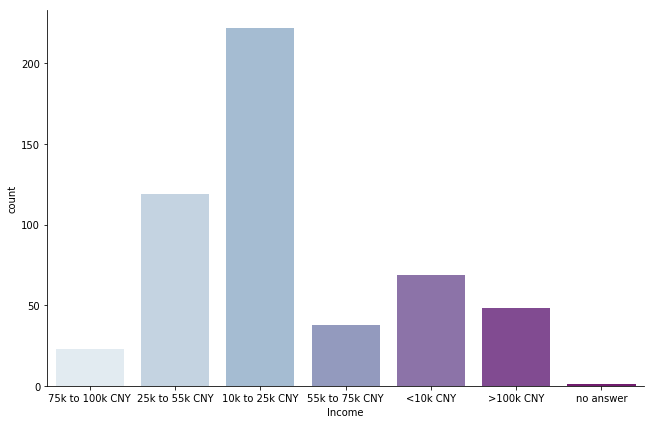

In [46]:
df.rename(columns = {'d8':'Income'}, inplace = True)
ds={1:"<10k CNY", 2:"10k to 25k CNY", 3:"25k to 55k CNY", 4:"55k to 75k CNY", 5:"75k to 100k CNY", 6:">100k CNY", 7:"no answer"}
df["Income"]=df["Income"].map(ds)
orda=list(["<10k CNY","10k to 25k CNY","25k to 55k CNY","55k to 75k CNY", "75k to 100k CNY", ">100k CNY", "no answer"])
g = sns.factorplot(x="Income", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.set_xticklabels(step=1);
g.savefig("output.png")

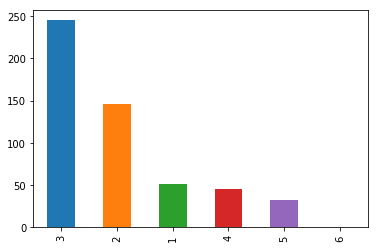

In [25]:
df["d3"].value_counts().plot(kind="bar")

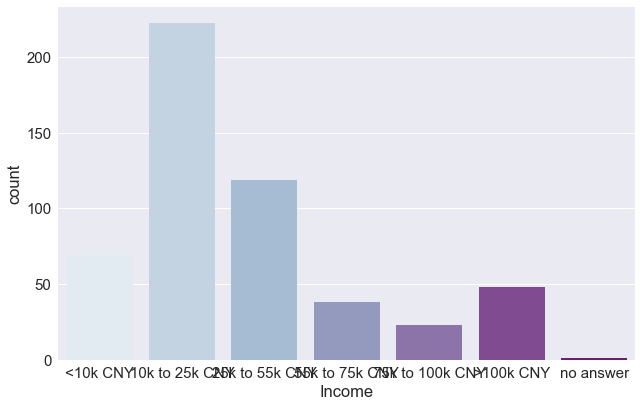

In [57]:
sns.set(font_scale=1.5)
orda=list(["<10k CNY","10k to 25k CNY","25k to 55k CNY","55k to 75k CNY", "75k to 100k CNY", ">100k CNY", "no answer"])
g = sns.factorplot(x="Income", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=orda)
g.set_xticklabels(step=1);
g.savefig("output.png")

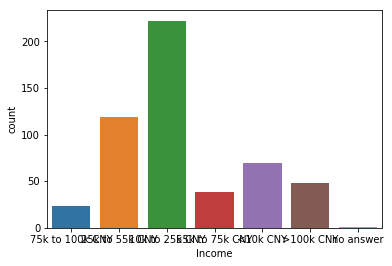

In [47]:
sns.countplot(x="Income", data=df)

In [41]:
df["Income"]

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
      ... 
491    NaN
492    NaN
493    NaN
494    NaN
495    NaN
496    NaN
497    NaN
498    NaN
499    NaN
500    NaN
501    NaN
502    NaN
503    NaN
504    NaN
505    NaN
506    NaN
507    NaN
508    NaN
509    NaN
510    NaN
511    NaN
512    NaN
513    NaN
514    NaN
515    NaN
516    NaN
517    NaN
518    NaN
519    NaN
520    NaN
Name: Income, Length: 520, dtype: object

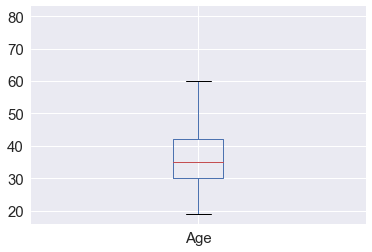

In [88]:
df.rename(columns = {"d4":'Age'}, inplace = True)
df.boxplot(column="Age");


In [62]:
df["d1"].value_counts()

1    280
2    240
Name: d1, dtype: int64

In [69]:
280/(240+280)

0

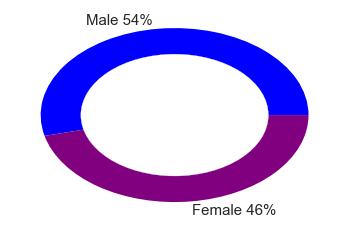

In [93]:
# library
import matplotlib.pyplot as plt
%matplotlib inline
# create data
names=['Male 54% ', 'Female 46%']
size=[280, 240]
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Create a circle for the center of the plot
plt.pie(size, labels=names, colors=['blue','purple']);
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
savefig("223.png");


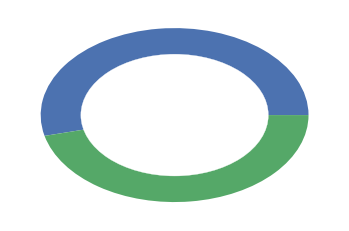

In [65]:
plt.pie(size)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


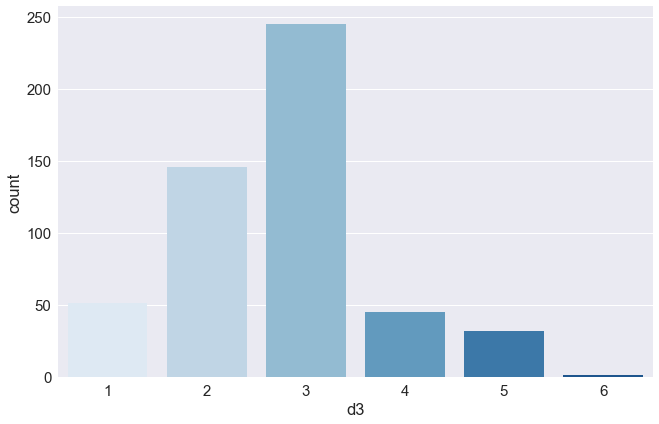

In [94]:

df.rename(columns = {'d5':'Education'}, inplace = True)
g = sns.factorplot(x="d3", data=df, kind="count",
                   palette="Blues", size=6, aspect=1.5)
g.set_xticklabels(step=1);
g.savefig("output.png")

In [75]:
df["Education"].value_counts()

4    481
3     26
2     13
Name: Education, dtype: int64

In [92]:
df["Age"].mean()

36.323076923076925

In [96]:
df["f19_1":"f19_8"].sum()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [f19_1] of <type 'str'>

In [99]:
df1=df.loc[:,"f19_1":"f19_8"]

for i in np.arange(0,19,1):
    print(df1.iloc[:,i].sum())

302.0
271.0
259.0
208.0
144.0
87.0
76.0
127.0


IndexError: single positional indexer is out-of-bounds

In [106]:
df1=df1.rename(columns = {'f19_1':'high product quality', }, inplace = True)
(df1.mean()).sort_values(ascending=False).round(2)

f19_1    0.76
f19_2    0.68
f19_3    0.65
f19_4    0.52
f19_5    0.36
f19_8    0.32
f19_6    0.22
f19_7    0.19
dtype: float64

In [103]:
df1["f19_1"].value_counts()

1.0    302
0.0     95
Name: f19_1, dtype: int64

In [117]:
df1=df.rename(columns = {'f18':'WTP more', }, inplace = True)
dg={1:"Yes", 2:"No"}
df1["WTP more"]=df1["WTP more"].map(dg)
sns.countplot(x="WTP more", data=df1)

TypeError: 'NoneType' object has no attribute '__getitem__'

In [144]:
df["f18"]
dg={1:"Yes", 2:"No"}
df["f18"]=df["f18"].map(dg)


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

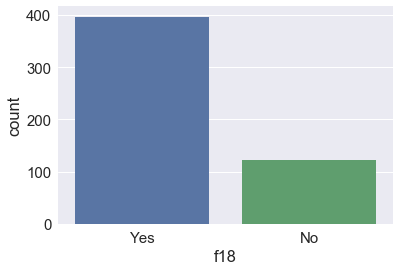

In [146]:
g=sns.countplot(x="f18", data=df)
g.savefig("out.png")